In [1]:
import aiohttp
import lxml
import pyquery
import tesserocr
import gerapy
import requests
import pandas as pd

In [2]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup('＜p>Hello</p>','lxml') 
print(soup.p.string)

＜p>Hello


In [6]:
r = requests.get('https://www.baidu.com/') 
print(r.status_code) 
print(r.text) #相应体
print(r.cookies)

200
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span

In [7]:
#get
r = requests.get('http://httpbin.org/get') 
print(r.text) #请求头 url ip


{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.27.1", 
    "X-Amzn-Trace-Id": "Root=1-62308de3-6b9af2a4194427114eb3fde5"
  }, 
  "origin": "36.5.187.253", 
  "url": "http://httpbin.org/get"
}



In [8]:
data = {
    'name': 'germey',
    'age' :  22
} 
r = requests.get("http://httpbin.org/get",params=data)
print(r.text) 

{
  "args": {
    "age": "22", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.27.1", 
    "X-Amzn-Trace-Id": "Root=1-62308de5-007b97de436c8f6e78b1ffce"
  }, 
  "origin": "36.5.187.253", 
  "url": "http://httpbin.org/get?name=germey&age=22"
}



In [9]:
r = requests.get("http://httpbin.org/get") 
print(type(r.text)) 
print(r.json()) 
print(type(r.json())) #将json形式的字符串转换为dict

<class 'str'>
{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.27.1', 'X-Amzn-Trace-Id': 'Root=1-62308de7-7541edba4eaa75e7603d0f6f'}, 'origin': '36.5.187.253', 'url': 'http://httpbin.org/get'}
<class 'dict'>


In [10]:
import re
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'
}
r = requests.get("https://www.zhihu.com/collection/hot", headers=headers)
#pattern = re.compile('explore-feed.*?question_link.*?>(.*?)</a>', re.S)
#pattern = re.compile('CollectionListCard-title.*?blank.*?>(.*?)</a>', re.S)
pattern = re.compile('<a href="/collection/.*?" class="CollectionListCard-title" data-za-detail-view-id="5821" data-za-detail-view-name="收藏夹标题点击">(.*?)</a>', re.S)
titles = re.findall(pattern, r.text)
print(titles)
#print(r.text)
#<a href="/collection/65636583" class="CollectionListCard-title" data-za-detail-view-id="5821" data-za-detail-view-name="收藏夹标题点击">影评，画评，漫评，书评各种评</a>
#<a href="/collection/42656470" class="CollectionListCard-title" data-za-detail-view-id="5821" data-za-detail-view-name="收藏夹标题点击">补充能量的温暖地方</a>
#<span role="button" tabindex="0" class="CollectionListCard-creatorName">汽车奇谈高小强</span>

['醍醐灌顶', '文史类书单', '有趣感动/惊为天人', '影评，画评，漫评，书评各种评', '自我认知', '游戏设计', '比较有想法的回答', '实用技能', '初夏冬瓜的玉米地', '其它行业知(内)识(幕)']


In [13]:
import datetime
import re
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
    'cookie': '_s_tentry=weibo.com; Apache=6717218152204.665.1647341772099; SINAGLOBAL=6717218152204.665.1647341772099; ULV=1647341772111:1:1:1:6717218152204.665.1647341772099:; UOR=,,www.wangt.cc; SUB=_2A25PNAepDeRhGeVH7VAQ9C7Pyj2IHXVsQH5hrDV8PUNbmtANLXP6kW9NTygRQVvsK1K1jHnHoi07yUEPjV3Uiu-q; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WhoEZWBbhOAlTzfJj8JzxDO5JpX5KzhUgL.Foe4SozpSh50eK22dJLoIEMLxKBLBonL12BLxKML1-qLBK-LxK-L12qLB-zLxKBLB.zL1h5XeKzt;\
    ALF=1678879607; SSOLoginState=1647343609'}
r = requests.get("https://s.weibo.com/top/summary?Refer=top_hot&topnav=1&wvr=6", headers=headers)
findTitleAndLink = re.compile('<a href="/weibo?.*?" target="_blank">(.*?)</a>')
findreduAndLink = re.compile('<span>(.*?)</span>')
titles = re.findall(findTitleAndLink, r.text)
redu = re.findall(findreduAndLink, r.text)
print("当前时间为：",datetime.datetime.now())
#print("热搜位：",titles)
hot_rank = pd.DataFrame(
                {"热搜":titles[1:],
                 "热度":redu})
#print(redu)
#print(titles[1:]) 
hot_rank

当前时间为： 2022-03-15 21:07:27.852764


,热搜,热度
0,邓伦道歉,4987363
1,315晚会,3760763
2,科技冬奥照见创新中国,3689560
3,邓伦偷逃税被追缴并罚款1.06亿元,3635892
4,泽连斯基劝俄军投降,2188629
5,兰州妇联调查女子疑15岁生子,1320688
6,邓伦被提醒督促后仍整改不彻底,1187759
7,韩国宣布向乌克兰提供军事援助,755786
8,中国金融要走自己的路,753185
9,豆瓣在部分应用商店已被下架,721614


In [12]:
r = requests.get("https://github.com/favicon.ico")
with open('favicon.ico','wb') as f:
    f.write(r.content)

In [15]:
data ={'name':'germey','age':'22'} 
r = requests.post("http://httpbin.org/post",data=data) 
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "22", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.27.1", 
    "X-Amzn-Trace-Id": "Root=1-623098b7-7bb079073a4ac7537aa9bcb8"
  }, 
  "json": null, 
  "origin": "36.5.187.253", 
  "url": "http://httpbin.org/post"
}



In [17]:
r = requests.get('http://www.jianshu.com') 
print(type(r.status_code), r.status_code) 
print(type(r.headers), r.headers) 
print(type(r.cookies), r.cookies)
print(type(r.url), r.url) 
print(type(r.history), r.history)

<class 'int'> 403
<class 'requests.structures.CaseInsensitiveDict'> {'Server': 'Tengine', 'Date': 'Tue, 15 Mar 2022 13:54:36 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}
<class 'requests.cookies.RequestsCookieJar'> <RequestsCookieJar[]>
<class 'str'> https://www.jianshu.com/
<class 'list'> [<Response [301]>]


In [29]:
r = requests.get("https://www.baidu.com") 
print(r.cookies) 
for key,value in r.cookies.items(): 
                 print(key + '=' + value )

<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]>
BDORZ=27315


<!DOCTYPE html><!--STATUS OK-->

    <html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><title>百度一下，你就知道</title>
<style index="newi" type="text/css">
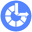

In [30]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36',
    'Cookie':'BIDUPSID=559FB86DBFC74647D9BE8EAA8CFF793A; PSTM=1646448806; BAIDUID=B08A930DB75E876152679E5114E04573:FG=1; BD_UPN=123253; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; __yjs_duid=1_7450ea1a28fad8197fb92242d2a24dd01646448834826; BDUSS=UxvRC1ZfkVZeFVSNks1U2tyME00My1HaS1xZmhFeUEzfjRQMFFDbXlQampRMUJpSVFBQUFBJCQAAAAAAAAAAAEAAACNRS9lsK7QprXEd3hyMjMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOO2KGLjtihiL; BDUSS_BFESS=UxvRC1ZfkVZeFVSNks1U2tyME00My1HaS1xZmhFeUEzfjRQMFFDbXlQampRMUJpSVFBQUFBJCQAAAAAAAAAAAEAAACNRS9lsK7QprXEd3hyMjMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOO2KGLjtihiL; H_PS_PSSID=35834_35970_35105_31660_34813_34584_35871_35948_35993_35982_35317_26350_35884_35723_22159_36061; H_PS_645EC=43865J6YFaV%2F%2FKiAlhwMyB1QK6D63yEwUdFo575qP3JKAttjyU7z%2FDZOLp0; delPer=0; BD_CK_SAM=1; PSINO=6; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm; BAIDUID_BFESS=B08A930DB75E876152679E5114E04573:FG=1; BDRCVFR[-pGxjrCMryR]=mk3SLVN4HKm; BDRCVFR[tox4WRQ4-Km]=mk3SLVN4HKm; ab_sr=1.0.1_ZTkzNzg5OTY4YzBlNzkyY2M1NzU0ZWFkNDU4ZThlMmQ3MjRlMDBiY2EwY2E2ZmVkMGRhZTIzNWFlYTdlNWNiYTRkNTI4ZDM0NGQ2OTU4M2M0YjFjZjNjZGIyYjEwZWQ3MmE1ZmMxOTMwNGRlNjJiMjRkMDgzODZlNmM5YWIyYTE5ZGQ1M2I2MTJhMzA1YzRmOTdlYTJjOWU2MjM2NGZjMTE0ODM4ZjU3OTFjN2UzZWUxY2ExMWZkNDBhZTA1ZTQz; BDRCVFR[CLK3Lyfkr9D]=mk3SLVN4HKm; RT="sl=0&ss=l0s7cxn2&tt=0&bcn=https%3A%2F%2Ffclog.baidu.com%2Flog%2Fweirwood%3Ftype%3Dperf&z=1&dm=baidu.com&si=cvtkv2fb41s&ul=25vr&hd=25x3"; BD_HOME=1;\
    BA_HECTOR=80210k8504258g2lqq1h318lk0r'
}
r = requests.get("https://www.baidu.com", headers=headers)
print(r.text)


<!DOCTYPE html><!--STATUS OK-->

    <html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><title>百度一下，你就知道</title>
<style index="newi" type="text/css">
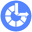

In [31]:
cookies = 'BIDUPSID=559FB86DBFC74647D9BE8EAA8CFF793A; PSTM=1646448806; BAIDUID=B08A930DB75E876152679E5114E04573:FG=1; BD_UPN=123253; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; __yjs_duid=1_7450ea1a28fad8197fb92242d2a24dd01646448834826; BDUSS=UxvRC1ZfkVZeFVSNks1U2tyME00My1HaS1xZmhFeUEzfjRQMFFDbXlQampRMUJpSVFBQUFBJCQAAAAAAAAAAAEAAACNRS9lsK7QprXEd3hyMjMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOO2KGLjtihiL; BDUSS_BFESS=UxvRC1ZfkVZeFVSNks1U2tyME00My1HaS1xZmhFeUEzfjRQMFFDbXlQampRMUJpSVFBQUFBJCQAAAAAAAAAAAEAAACNRS9lsK7QprXEd3hyMjMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOO2KGLjtihiL; H_PS_PSSID=35834_35970_35105_31660_34813_34584_35871_35948_35993_35982_35317_26350_35884_35723_22159_36061; H_PS_645EC=43865J6YFaV%2F%2FKiAlhwMyB1QK6D63yEwUdFo575qP3JKAttjyU7z%2FDZOLp0; delPer=0; BD_CK_SAM=1; PSINO=6; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm; BAIDUID_BFESS=B08A930DB75E876152679E5114E04573:FG=1; BDRCVFR[-pGxjrCMryR]=mk3SLVN4HKm; BDRCVFR[tox4WRQ4-Km]=mk3SLVN4HKm; ab_sr=1.0.1_ZTkzNzg5OTY4YzBlNzkyY2M1NzU0ZWFkNDU4ZThlMmQ3MjRlMDBiY2EwY2E2ZmVkMGRhZTIzNWFlYTdlNWNiYTRkNTI4ZDM0NGQ2OTU4M2M0YjFjZjNjZGIyYjEwZWQ3MmE1ZmMxOTMwNGRlNjJiMjRkMDgzODZlNmM5YWIyYTE5ZGQ1M2I2MTJhMzA1YzRmOTdlYTJjOWU2MjM2NGZjMTE0ODM4ZjU3OTFjN2UzZWUxY2ExMWZkNDBhZTA1ZTQz; BDRCVFR[CLK3Lyfkr9D]=mk3SLVN4HKm; RT="sl=0&ss=l0s7cxn2&tt=0&bcn=https%3A%2F%2Ffclog.baidu.com%2Flog%2Fweirwood%3Ftype%3Dperf&z=1&dm=baidu.com&si=cvtkv2fb41s&ul=25vr&hd=25x3"; BD_HOME=1;\
    BA_HECTOR=80210k8504258g2lqq1h318lk0r'
jar = requests.cookies.RequestsCookieJar() 
headers = { 
    'Host':'www.baidu.com', 
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36',
}
for cookie in cookies.split(','): 
    key,value = cookie.split('=', 1) 
    jar.set(key,value) 
r = requests.get("https://www.baidu.com", cookies=jar, headers =headers) 
print(r. text)

## 正则

In [37]:
content ='Hello 123 4567 World_This is a Regex Demo' 
print(len(content)) 
result = re.match('^Hello\s\d\d\d\s\d{4}\s\w{10}', content)
print(result) 
print(result.group()) 
print(result.span())

41
<re.Match object; span=(0, 25), match='Hello 123 4567 World_This'>
Hello 123 4567 World_This
(0, 25)


In [38]:
content ='Hello 1234567 World_This is a Regex Demo'
result = re.match('^Hello\s(\d+)\sWorld', content) 
print(result) 
print(result .group()) 
print(result.group(1)) 
print(result.span())

<re.Match object; span=(0, 19), match='Hello 1234567 World'>
Hello 1234567 World
1234567
(0, 19)


In [39]:
#通用匹配
content ='Hello 123 4567 World_This is a Regex Demo' 
result = re.match ('^Hello.*Demo$',content) 
print(result) 
print(result.group()) 
print(result.span())

<re.Match object; span=(0, 41), match='Hello 123 4567 World_This is a Regex Demo'>
Hello 123 4567 World_This is a Regex Demo
(0, 41)


In [44]:
#贪婪 非贪婪
content = 'Hello 1234567 World_This is a Regex Demo' 
result = re.match('^He.*(\d+).*Demo$',content) 
print(result) 
print(result.group(1)) #.*太贪婪，把数字都显示完了

<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
7


In [46]:
content ='Hello 1234567 World_This is a Regex Demo' 
result = re.match('^He.*?(\d+).*?Demo$',content) 
print(result) 
print(result.group(1))#.*?不贪婪

<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
1234567


## 安徽省教育厅

In [109]:
def get_one_page(url): 
    headers = { 
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'
       }
    response = requests.get(url, headers=headers) 
    if response.status_code == 200: 
        return response.text 
    return None

In [71]:
def main():
    url = 'http://jyt.ah.gov.cn/content/column/31401491?pageIndex=1'
    html = get_one_page(url)
    print(html)
    
main()

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta content="yes" name="apple-mobile-web-app-capable">
  <meta name="viewport" content="width=device-width,height=device-height,initial-scale=1,maximum-scale=1.0,user-scalable=no">
  <title>教育要闻_安徽省教育厅</title>
  <meta name="SiteName" content="安徽省教育厅">
<meta name="SiteDomain" content="jyt.ah.gov.cn">
<meta name="SiteIDCode" content="3400000072">
<meta name="ColumnName" content="教育要闻">
<meta name="ColumnType" content="工作动态">
<meta name="ColumnDescription" content="本地区政务要闻、工作动态、通知公告等信息">
<meta name="ColumnKeywords" content="工作动态">
<meta name="Keywords" content="中共安徽省委教育工作委员会,中共安徽省委教育工委,安徽省教育厅,安徽省教育厅政府门户网站,安徽教育网,安徽,教育," >
<meta name="Description" content="安徽教育网作为政府部门和教育行业的门户网站，是省委教育工委、省教育厅的政务窗口，是重要的新闻媒体。安徽教育网分为新闻中心、信息公开、在线办事、公众互动、资源中心、网站联盟六大版块">
<meta name="HtmlGenerateTime" content="2022-03-16 00:31:59">
<link rel="shortcut icon" type="image/x-icon" href="/_res/images/favicon

In [129]:
url = 'http://jyt.ah.gov.cn/content/column/31401491?pageIndex=1'
def parse_one_page(html):
    date = re.compile('<span class="right date">(.*?)</span>',re.S)
    pattern = re.compile('target="_blank" title="(.*?)" class="left">',re.S) 
    items = re.findall(pattern, html) 
    date = re.findall(date, html)
    return numpy.column_stack((items,date)).tolist()
html = get_one_page(url)
a = parse_one_page(html)
a

[['省教育厅召开2022年人大代表建议和政协委员提案交办会', '2022-03-11'],
 ['程丽华强调：坚持目标导向问题导向效果导向 推动高校党建全面加强全面提质', '2022-03-10'],
 ['安徽省教育系统干部师生持续聚焦全国“两会” 热议教育改革发展', '2022-03-09'],
 ['省委教育工委巡察组巡察安徽理工学校党委情况反馈会召开', '2022-03-08'],
 ['省委教育工委巡察组巡察安徽化工学校党委情况反馈会召开', '2022-03-08'],
 ['省委教育工委 省教育厅召开审计进点见面会', '2022-03-08'],
 ['2022年政府工作报告为教育划重点：促进教育公平与质量提升', '2022-03-05'],
 ['安徽省教育系统干部师生热切关注2022年全国“两会”', '2022-03-05'],
 ['我省教育系统一批单位和个人获2021年度三八红旗手（集体）、标兵荣誉称号', '2022-03-04'],
 ['安徽援疆教师与新疆皮山县教师师徒结对  打造一支带不走的教师队伍', '2022-03-03'],
 ['省教育厅组织开展全省教育系统春季新冠肺炎疫情防控应急处置桌面演练', '2022-03-03'],
 ['我省教育系统3人获命名第七批安徽省岗位学雷锋标兵', '2022-03-03'],
 ['教育部印发通知部署开展第4个近视防控宣传教育月活动', '2022-03-02'],
 ['我省再添19所省级节水型高校', '2022-02-28'],
 ['省委教育工委召开理论学习中心组学习会议', '2022-02-26'],
 ['省委教育工委省教育厅召开经济责任审计自查自纠动员部署会议', '2022-02-25'],
 ['省教育厅与中国银行安徽省分行签署《助力职业教育高质量发展战略合作协议》', '2022-02-23'],
 ['省委常委会会议强调 加强高校党的建设和思想政治工作 统筹推动民生工程取得实实在在效果', '2022-02-22'],
 ['我省两项经验做法入选2021年度全国基础教育优秀工作案例', '2022-02-17'],
 ['全省中小学、幼儿园免费核酸检测护航“开学季”', '2022-02-16'],
 ['我省扎实推进“双减”专项督导工作', '2

In [130]:
import json
def write_to_file(content): 
    with open('result.txt','a',encoding ='utf-8') as f: 
        print(type(json.dumps(content))) 
        f.write(json.dumps(content,ensure_ascii=False)+'\n') 

In [131]:
def main(offset): 
    url = 'http://jyt.ah.gov.cn/content/column/31401491?pageIndex='+ str(offset) 
    html = get_one_page(url) 
    for item in parse_one_page(html):
        print(item)
        write_to_file(item)

In [132]:
for i in range(10):
    main(offset=i+1)


['省教育厅召开2022年人大代表建议和政协委员提案交办会', '2022-03-11']
<class 'str'>
['程丽华强调：坚持目标导向问题导向效果导向 推动高校党建全面加强全面提质', '2022-03-10']
<class 'str'>
['安徽省教育系统干部师生持续聚焦全国“两会” 热议教育改革发展', '2022-03-09']
<class 'str'>
['省委教育工委巡察组巡察安徽理工学校党委情况反馈会召开', '2022-03-08']
<class 'str'>
['省委教育工委巡察组巡察安徽化工学校党委情况反馈会召开', '2022-03-08']
<class 'str'>
['省委教育工委 省教育厅召开审计进点见面会', '2022-03-08']
<class 'str'>
['2022年政府工作报告为教育划重点：促进教育公平与质量提升', '2022-03-05']
<class 'str'>
['安徽省教育系统干部师生热切关注2022年全国“两会”', '2022-03-05']
<class 'str'>
['我省教育系统一批单位和个人获2021年度三八红旗手（集体）、标兵荣誉称号', '2022-03-04']
<class 'str'>
['安徽援疆教师与新疆皮山县教师师徒结对  打造一支带不走的教师队伍', '2022-03-03']
<class 'str'>
['省教育厅组织开展全省教育系统春季新冠肺炎疫情防控应急处置桌面演练', '2022-03-03']
<class 'str'>
['我省教育系统3人获命名第七批安徽省岗位学雷锋标兵', '2022-03-03']
<class 'str'>
['教育部印发通知部署开展第4个近视防控宣传教育月活动', '2022-03-02']
<class 'str'>
['我省再添19所省级节水型高校', '2022-02-28']
<class 'str'>
['省委教育工委召开理论学习中心组学习会议', '2022-02-26']
<class 'str'>
['省委教育工委省教育厅召开经济责任审计自查自纠动员部署会议', '2022-02-25']
<class 'str'>
['省教育厅与中国银行安徽省分行签署《助力职业教育高质量发展战略合作协议》', '20

['习近平总书记的回信在我省教育系统引发热烈反响', '2021-09-10']
<class 'str'>
['李锦斌强调：坚持立德树人做好『双减』工作 全心全意办好人民满意的教育', '2021-09-10']
<class 'str'>
['王清宪在合肥市看望慰问教师时强调：尊师重教 立德树人', '2021-09-10']
<class 'str'>
['程丽华强调：牢记为党育人为国育才使命 争做党和人民满意的好老师', '2021-09-10']
<class 'str'>
['杜集区深化校长职级制改革  推进教育高质量发展', '2021-09-10']
<class 'str'>
['“庆祝教师节”系列报道之五：姚翔\u2002\u2002不忘初心 做乡村教育人', '2021-09-10']
<class 'str'>
['“庆祝教师节”系列报道之四：项娟   做专业班主任 只为更好地陪伴学生成长', '2021-09-09']
<class 'str'>
['“庆祝教师节”系列报道之三：窦祖红  育滁城芬芳桃李  守幼教使命初心', '2021-09-09']
<class 'str'>
['安徽五措并举  扎实推进“双减”工作专项督导', '2021-09-09']
<class 'str'>
['“庆祝教师节”系列报道之二：董功平  守望桑梓终不悔 爱润桃李满园春', '2021-09-08']
<class 'str'>
['“庆祝教师节”系列报道之一：葛春梅\u2002\u2002用“母爱般的关怀”立德树人', '2021-09-07']
<class 'str'>
['《习近平新时代中国特色社会主义思想学生读本》进课堂', '2021-09-02']
<class 'str'>
['安徽：“双减”之下  新学期开学新意焕发', '2021-09-01']
<class 'str'>
['延乔路小学的开学第一课', '2021-09-01']
<class 'str'>
['“只有打动学生，才能影响学生”  西藏山南市第二高级中学德育工作掠影', '2021-09-01']
<class 'str'>
['全省综合防控儿童青少年近视工作联席会议机制第二次会议召开', '2021-08-31']
<class 'str'>
['省委教育工委召

## 猫眼电影

In [31]:
#https://www.maoyan.com/board/4?timeStamp=1647399522958&channelId=40011&index=3&signKey=ebaadcaf048e50bfea537de0d118efba&sVersion=1&webdriver=false
    
headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
        }
r = requests.get("https://www.maoyan.com/board/4?timeStamp=1647400571493&channelId=40011&index=5&signKey=e1e3e9244c48edd9e2c89391411ac63d&sVersion=1&webdriver=false", headers=headers)
print(r.text)

<!DOCTYPE html><html lang=en><head><meta charset=utf-8><link href=//p0.meituan.net rel=dns-prefetch><link href=//p1.meituan.net rel=dns-prefetch><link href=//s3plus.meituan.net rel=dns-prefetch><title>猫眼验证中心</title><meta name=keywords content="猫眼验证中心"><meta name=description content="猫眼验证中心"><meta name=applicable-device content=mobile><meta name=viewport content="width=device-width,initial-scale=1,user-scalable=no"><meta name=format-detection content="telephone=no"><meta name=format-detection content="address=no"><meta name=for content=maoyan.com><link rel=icon href=https://e.pipi.cn/overseas/faviconmy.ico type=image/x-icon><script src=https://e.pipi.cn/overseas/polyfill.min.js></script><script>var AppData= {"redirectURL":"https%3A%2F%2Fwww.maoyan.com%2Fboard%2F4%3FtimeStamp%3D1647400571493%26sVersion%3D1%26webdriver%3Dfalse%26index%3D5%26signKey%3De1e3e9244c48edd9e2c89391411ac63d%26channelId%3D40011","domain":"www.maoyan.com","project":"verify","env":"prod"}</script><script crossorigin

In [30]:
def get_one_page_maoyan(url): 
    headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
        }
    response = requests.get(url, headers=headers) 
    
    if response.status_code == 200: 
        return response.text 
    return None

In [47]:
def main():
    url = 'https://www.maoyan.com/board/4?timeStamp=1647400861841&channelId=40011&index=2&signKey=57c4be67dbca168bd7f98f4e1c41a995&sVersion=1&webdriver=false'
    html = get_one_page_maoyan(url)
    print(html)
    
main()

<!DOCTYPE html>

<!--[if IE 8]><html class="ie8"><![endif]-->
<!--[if IE 9]><html class="ie9"><![endif]-->
<!--[if gt IE 9]><!--><html><!--<![endif]-->
<head>
  <title>TOP100榜 - 猫眼电影 - 一网打尽好电影</title>
  
  <link rel="dns-prefetch" href="//p0.meituan.net"  />
  <link rel="dns-prefetch" href="//p1.meituan.net"  />
  <link rel="dns-prefetch" href="//ms0.meituan.net" />
  <link rel="dns-prefetch" href="//s0.meituan.net" />
  <link rel="dns-prefetch" href="//ms1.meituan.net" />
  <link rel="dns-prefetch" href="//analytics.meituan.com" />
  <link rel="dns-prefetch" href="//report.meituan.com" />
  <link rel="dns-prefetch" href="//frep.meituan.com" />

  
  <meta charset="utf-8">
  <meta name="keywords" content="猫眼电影,电影排行榜,热映口碑榜,最受期待榜,国内票房榜,北美票房榜,猫眼TOP100">
  <meta name="description" content="猫眼电影热门榜单,包括热映口碑榜,最受期待榜,国内票房榜,北美票房榜,猫眼TOP100,多维度为用户进行选片决策">
  <meta http-equiv="cleartype" content="yes" />
  <meta http-equiv="X-UA-Compatible" content="IE=edge" />
  <meta name="renderer" content="webki

In [115]:
import re
import numpy
url = 'https://www.maoyan.com/board/4?timeStamp=1647403479946&channelId=40011&index=5&signKey=02e6afabf0eafa71ea480a5e29e2dc0f&sVersion=1&webdriver=false&offset=0'
def parse_one_page_maoyan(html):
    date = re.compile('<p class="name"><a href="/films/.*?" title="(.*?)" data-act="boarditem-click" data-val="{movieId:.*?}">.*?</a></p>',re.S)
    pattern = re.compile('<p class="star">(.*?)</p>',re.S) 
    score = re.compile('<p class="score"><i class="integer">(.*?)</i><i class="fraction">(.*?)</i></p>',re.S) 
    score = re.findall(score, html)
    items = re.findall(pattern, html) 
    date = re.findall(date, html)
    for i in range(len(date)):
        date[i] = date[i].strip()
        items[i] = items[i].strip()
    out = numpy.column_stack((date,items,score)).tolist()
    return out
html = get_one_page_maoyan(url)
a = parse_one_page_maoyan(html)
a
#<p class="score"><i class="integer">9.</i><i class="fraction">6</i></p>

[['我不是药神', '主演：徐峥,周一围,王传君', '9.', '6'],
 ['肖申克的救赎', '主演：蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿', '9.', '5'],
 ['绿皮书', '主演：维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼', '9.', '5'],
 ['海上钢琴师', '主演：蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世', '9.', '3'],
 ['霸王别姬', '主演：张国荣,张丰毅,巩俐', '9.', '4'],
 ['美丽人生', '主演：罗伯托·贝尼尼,朱斯蒂诺·杜拉诺,赛尔乔·比尼·布斯特里克', '9.', '3'],
 ['小偷家族', '主演：中川雅也,利利·弗兰克,安藤樱', '8.', '1'],
 ['哪吒之魔童降世', '主演：吕艳婷,囧森瑟夫,瀚墨', '9.', '6'],
 ['这个杀手不太冷', '主演：让·雷诺,加里·奥德曼,娜塔莉·波特曼', '9.', '4'],
 ['怦然心动', '主演：玛德琳·卡罗尔,卡兰·麦克奥利菲,艾丹·奎因', '8.', '9']]

In [116]:
import json
def write_to_file(content): 
    with open('result_maoyan_top100.txt','a',encoding ='utf-8') as f: 
        print(type(json.dumps(content).replace('\n', '')))
        f.write(json.dumps(content,ensure_ascii=False)+'\n') 
for i in range(len(a)):
    a[i][2] = a[i][2] +''+ a[i][3]
    del a[i][3]
for item in a:
        print(item)
        write_to_file(item)

['我不是药神', '主演：徐峥,周一围,王传君', '9.6']
<class 'str'>
['肖申克的救赎', '主演：蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿', '9.5']
<class 'str'>
['绿皮书', '主演：维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼', '9.5']
<class 'str'>
['海上钢琴师', '主演：蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世', '9.3']
<class 'str'>
['霸王别姬', '主演：张国荣,张丰毅,巩俐', '9.4']
<class 'str'>
['美丽人生', '主演：罗伯托·贝尼尼,朱斯蒂诺·杜拉诺,赛尔乔·比尼·布斯特里克', '9.3']
<class 'str'>
['小偷家族', '主演：中川雅也,利利·弗兰克,安藤樱', '8.1']
<class 'str'>
['哪吒之魔童降世', '主演：吕艳婷,囧森瑟夫,瀚墨', '9.6']
<class 'str'>
['这个杀手不太冷', '主演：让·雷诺,加里·奥德曼,娜塔莉·波特曼', '9.4']
<class 'str'>
['怦然心动', '主演：玛德琳·卡罗尔,卡兰·麦克奥利菲,艾丹·奎因', '8.9']
<class 'str'>


In [118]:
def main(offset): 
    url = 'https://www.maoyan.com/board/4?timeStamp=1647403805157&channelId=40011&index=10&signKey=c83c76a445af8e8bd65a3ad4feba3d92&sVersion=1&webdriver=false&offset='+ str(offset) 
    html = get_one_page_maoyan(url) 
    a = parse_one_page_maoyan(html)
    for i in range(len(a)):
        a[i][2] = a[i][2] +''+ a[i][3]
        del a[i][3]
    for item in a:
        print(item)
        write_to_file(item)

In [119]:
for i in range(10): 
    main(offset=i * 10)

['我不是药神', '主演：徐峥,周一围,王传君', '9.6']
<class 'str'>
['肖申克的救赎', '主演：蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿', '9.5']
<class 'str'>
['绿皮书', '主演：维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼', '9.5']
<class 'str'>
['海上钢琴师', '主演：蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世', '9.3']
<class 'str'>
['霸王别姬', '主演：张国荣,张丰毅,巩俐', '9.4']
<class 'str'>
['美丽人生', '主演：罗伯托·贝尼尼,朱斯蒂诺·杜拉诺,赛尔乔·比尼·布斯特里克', '9.3']
<class 'str'>
['小偷家族', '主演：中川雅也,利利·弗兰克,安藤樱', '8.1']
<class 'str'>
['哪吒之魔童降世', '主演：吕艳婷,囧森瑟夫,瀚墨', '9.6']
<class 'str'>
['这个杀手不太冷', '主演：让·雷诺,加里·奥德曼,娜塔莉·波特曼', '9.4']
<class 'str'>
['怦然心动', '主演：玛德琳·卡罗尔,卡兰·麦克奥利菲,艾丹·奎因', '8.9']
<class 'str'>
['盗梦空间', '主演：莱昂纳多·迪卡普里奥,渡边谦,约瑟夫·高登-莱维特', '9.0']
<class 'str'>
['阿甘正传', '主演：汤姆·汉克斯,罗宾·怀特,加里·西尼斯', '9.4']
<class 'str'>
['星际穿越', '主演：马修·麦康纳,安妮·海瑟薇,杰西卡·查斯坦', '9.3']
<class 'str'>
['千与千寻', '主演：柊瑠美,周冬雨,井柏然', '9.3']
<class 'str'>
['楚门的世界', '主演：金·凯瑞,劳拉·琳妮,诺亚·艾默里奇', '8.9']
<class 'str'>
['触不可及', '主演：弗朗索瓦·克鲁塞,奥马·希,安娜·勒尼', '9.1']
<class 'str'>
['辛德勒的名单', '主演：连姆·尼森,拉尔夫·费因斯,本·金斯利', '9.2']
<class 'str'>
['情书', '主演：中山美穗,丰川悦司,酒井美纪', '8.9']
<class 'str